## Основы предобработки данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

import warnings
warnings.filterwarnings('ignore')

### Загрузка данных и предварительный анализа

Dibetes dataset https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [2]:
diabetes_df = pd.read_csv('diabetes.csv', index_col=None)
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Выведите размерность набора

In [3]:
diabetes_df.shape

(768, 9)

#### Выведите первые 7 записей набора

In [4]:
diabetes_df.head(7) #tail - с конца, sample - случайные

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### В каких шкалах представлены признаки?

In [6]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Ratio: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
Nominal: 'Outcome'

### Изучение и обработка количественных признаков

In [7]:
diabetes_df.describe()  #diabetes_df['Pregnancies'].describe()
                        # или diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure']].describe() если несколько

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [8]:
diabetes_df.var()

Pregnancies                    11.354
Glucose                      1022.248
BloodPressure                 374.647
SkinThickness                 254.473
Insulin                     13281.180
BMI                            62.160
DiabetesPedigreeFunction        0.110
Age                           138.303
Outcome                         0.227
dtype: float64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

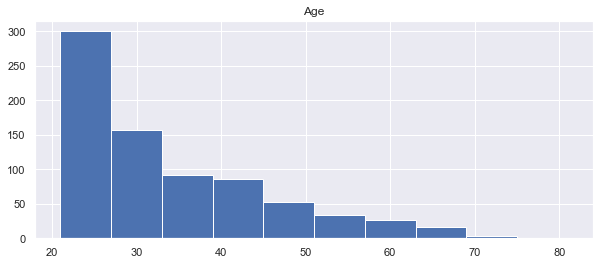

In [9]:
diabetes_df[['Age']].hist(figsize=(10, 4))

#### Как вывести гистограммы сразу для нескольких признаков?

array([[<AxesSubplot:title={'center':'Pregnancies'}>],
       [<AxesSubplot:title={'center':'Glucose'}>],
       [<AxesSubplot:title={'center':'BloodPressure'}>]], dtype=object)

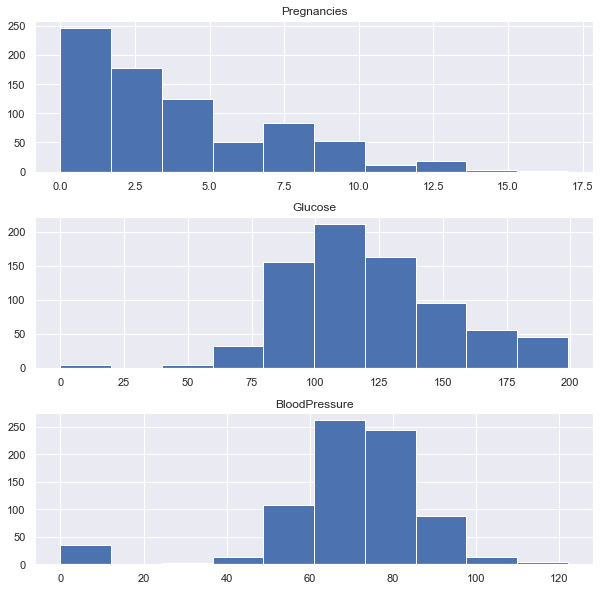

In [10]:
diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure']].hist(figsize=(10, 10), layout=(3, 1))

**Histograms vs. Kernel Density Estimation** <br>
https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28 

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

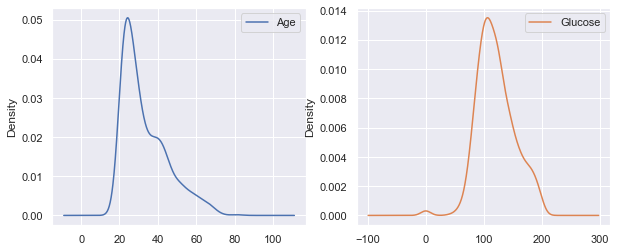

In [11]:
diabetes_df[['Age','Glucose']].plot(kind='density', layout=(1, 2), subplots=True,
                                    figsize=(10, 4), sharex=False)

<AxesSubplot:xlabel='Age', ylabel='Density'>

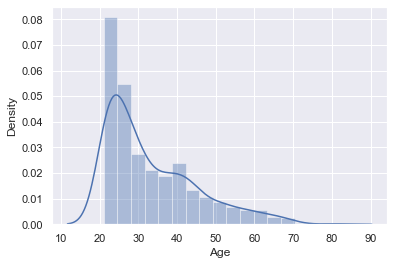

In [12]:
sns.distplot(diabetes_df['Age'])

### Обработка пропущенных значений

#### Поиск пропусков

In [13]:
no_zero_columns = list (set(diabetes_df.columns) - {'Outcome', 'Pregnancies'})
#Предполагаем, что Pregnancies и Outcome ненулевые, поэтому их убираем.

In [14]:
(diabetes_df[no_zero_columns] == 0).sum()
#diabetes_df[no_zero_columns] == 0 - верни мне те строки в колонках, где 0;
#.sum() - суммируем результат и видим, в каком столбце столько нулевых строк.
#Если допустим нужно будет посчитать долю нулевых строк, то можно взять среднее: (diabetes_df[no_zero_columns] == 0).mean()

BloodPressure                35
SkinThickness               227
DiabetesPedigreeFunction      0
BMI                          11
Age                           0
Insulin                     374
Glucose                       5
dtype: int64

#### Как заменить все пропуски на NaN?

In [5]:
zero_columns = ['BloodPressure', 'BMI', 'Glucose', 'SkinThickness'] #В каких данных точно не может быть адекватное значение 0
diabetes_df[zero_columns].head()

,BloodPressure,BMI,Glucose,SkinThickness
0,72,33.6,148,35
1,66,26.6,85,29
2,64,23.3,183,0
3,66,28.1,89,23
4,40,43.1,137,35


In [6]:
#diabetes_df[zero_columns].replace(0, np.NaN, inplace=True);
diabetes_df.loc[:, zero_columns] = diabetes_df[zero_columns].replace(0, np.NaN)

diabetes_df[zero_columns].head()

,BloodPressure,BMI,Glucose,SkinThickness
0,72.0,33.6,148.0,35.0
1,66.0,26.6,85.0,29.0
2,64.0,23.3,183.0,NaN
3,66.0,28.1,89.0,23.0
4,40.0,43.1,137.0,35.0


In [57]:
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Age_equal                     0
Age_expert                    0
dtype: int64

In [18]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


<AxesSubplot:>

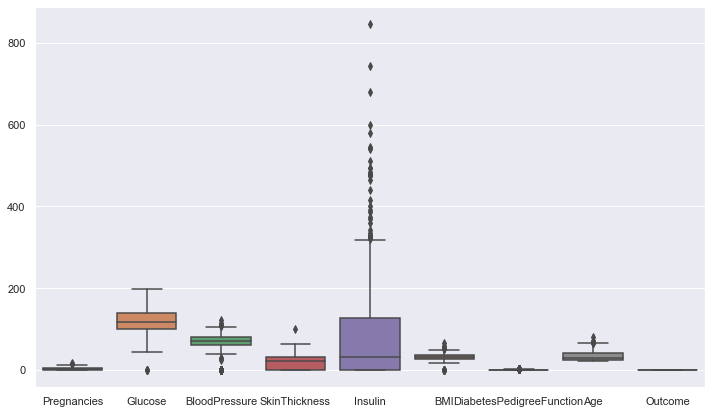

In [19]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

#### Работа с пропусками

**"Плохие" способы:**

In [20]:

print ('Исходный размер: ', diabetes_df.shape)

    # Удаляем строки
print ('Удалили все строки с пропусками: ', diabetes_df.dropna(how='any', axis=0).shape)
print ('Удалили только полностью пустые строки: ', diabetes_df.dropna(how='all', axis=0).shape)

    # Удаляем столбцы
print ('Удалили все столбцы с пропусками: ', diabetes_df.dropna(how='any', axis=1).shape)
print ('Удалили только полностью пустые столбцы: ',diabetes_df.dropna(how='all', axis=1).shape)



Исходный размер:  (768, 9)
Удалили все строки с пропусками:  (768, 9)
Удалили только полностью пустые строки:  (768, 9)
Удалили все столбцы с пропусками:  (768, 9)
Удалили только полностью пустые столбцы:  (768, 9)


In [7]:
diabetes_df.isnull().mean()

Pregnancies                 0.000
Glucose                     0.007
BloodPressure               0.046
SkinThickness               0.296
Insulin                     0.000
BMI                         0.014
DiabetesPedigreeFunction    0.000
Age                         0.000
Outcome                     0.000
dtype: float64

**Удалить столбцы, в которых много пропущенных значение**

In [13]:
diabetes_df.loc[:, diabetes_df.isnull().mean() > .25].columns.to_list()

['SkinThickness']

**Заполняем пропуски**

In [14]:

diabetes_df.fillna(diabetes_df.mean(), inplace=True)

# diabetes_df['Glucose'].fillna((diabetes['Glucose']).mode()[0], inplace=True)
# diabetes_df['BMI'].fillna((diabetes['BMI']).mean(), inplace=True)
# diabetes_df['Insulin'].fillna((diabetes['Insulin']).median(), inplace=True)

diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Обработка выбросов

<AxesSubplot:xlabel='Insulin'>

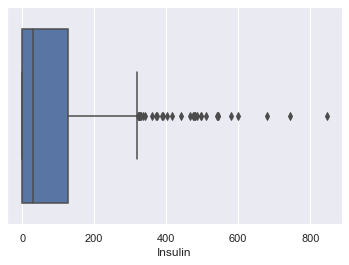

In [15]:
sns.boxplot(x='Insulin', data=diabetes_df)
#Первый квантиль показывается как полоска вертикальная узкая слева - тут его не видно
#Узкая полоска дальше - медиана - второй квантиль
#Вторая большая полоска (широкая большая) - третий квантиль
#Дальше идет четвертый квантиль - горизонтальная линия
#Вертикальные линии показывают разброс между первым и четвертым квантилем - тут слева не видно "ус".
#Все, что вне вертикальных полосок - выбросы

<AxesSubplot:>

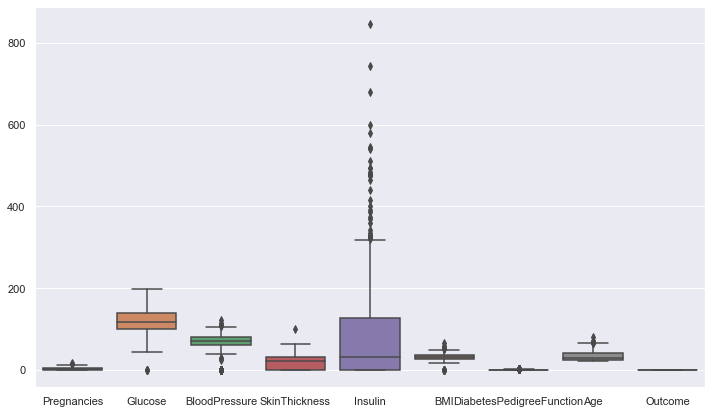

In [24]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df) #Построили ящики с усами длля всех признаков. Тут с выбросами

**Winsorizing**

In [17]:
diabetes_df['Insulin'] = diabetes_df.Insulin.clip(lower=diabetes_df.Insulin.quantile(0.05), 
                                                  upper=diabetes_df.Insulin.quantile(0.95))

In [26]:
diabetes_df.shape

(768, 9)

<AxesSubplot:>

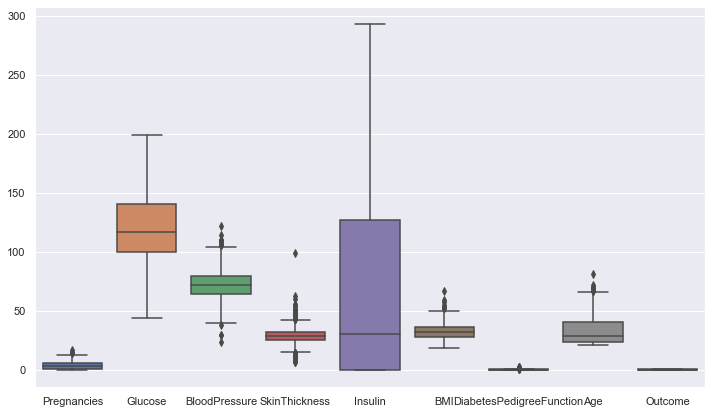

In [18]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df) #Убрали выбросы с картинки

### Дискретизация данных (binning)

**Equal-width partitioning**


In [19]:
diabetes_df['Age_equal'] = pd.cut(diabetes_df['Age'], 5) #Функция добавляет столбец с 5 равными промежутками возраста
diabetes_df.Age_equal.value_counts()

(20.94, 33.0]    474
(33.0, 45.0]     176
(45.0, 57.0]      76
(57.0, 69.0]      39
(69.0, 81.0]       3
Name: Age_equal, dtype: int64

**Expert partitioning**

In [20]:
bins = [0, 12, 19, 35, 60, 100]

group_names = ['Child', 'Teenager', 'Young', 'Adult','Elderly']

#Сделали заданное разбиение с заданными именами промежутков
diabetes_df['Age_expert'] = pd.cut(diabetes_df['Age'], bins, labels=group_names)

diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_equal,Age_expert
0,6,148.0,72.0,35.000,0.0,33.6,0.627,50,1,"(45.0, 57.0]",Adult
1,1,85.0,66.0,29.000,0.0,26.6,0.351,31,0,"(20.94, 33.0]",Young
2,8,183.0,64.0,29.153,0.0,23.3,0.672,32,1,"(20.94, 33.0]",Young
3,1,89.0,66.0,23.000,94.0,28.1,0.167,21,0,"(20.94, 33.0]",Young
4,0,137.0,40.0,35.000,168.0,43.1,2.288,33,1,"(20.94, 33.0]",Young


In [21]:
diabetes_df.Age_expert.value_counts()

Young       498
Adult       243
Elderly      27
Child         0
Teenager      0
Name: Age_expert, dtype: int64

### Изучение категориальных и бинарных признаков

In [22]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [23]:
diabetes_df['Age_equal'].value_counts()

(20.94, 33.0]    474
(33.0, 45.0]     176
(45.0, 57.0]      76
(57.0, 69.0]      39
(69.0, 81.0]       3
Name: Age_equal, dtype: int64

In [33]:
diabetes_df['Age_expert'].value_counts()

Young       498
Adult       243
Elderly      27
Child         0
Teenager      0
Name: Age_expert, dtype: int64

<AxesSubplot:>

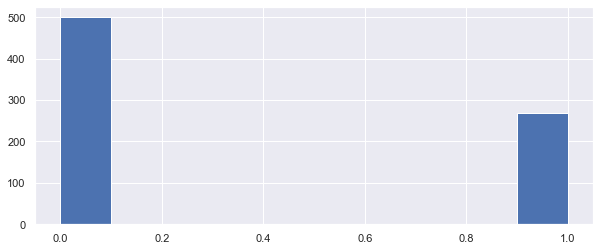

In [25]:
diabetes_df['Outcome'].hist(figsize=(10, 4)) #Демонстрация плохой гистограммы для бинарного признака

<AxesSubplot:>

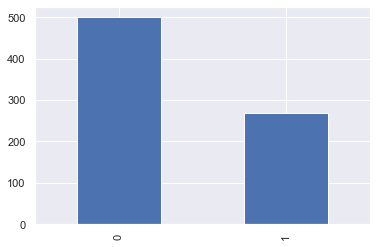

In [24]:
diabetes_df['Outcome'].value_counts().plot(kind='bar') #Демонстрация хорошей гистограммы для бинарного признака

<AxesSubplot:xlabel='Outcome', ylabel='count'>

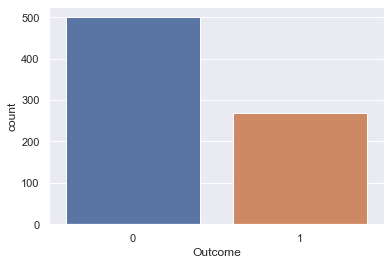

In [26]:
sns.countplot(x='Outcome', data=diabetes_df) #Тут еще и покрасили

<AxesSubplot:xlabel='Age_equal', ylabel='count'>

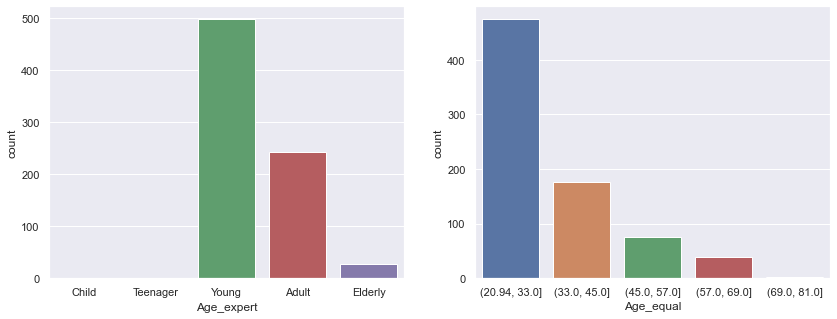

In [27]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='Age_expert', data=diabetes_df, ax=axes[0])
sns.countplot(x='Age_equal', data=diabetes_df, ax=axes[1])

### Изчение взаимодействия признаков

#### Только количественные признаки

Text(0, 0.5, 'Insulin')

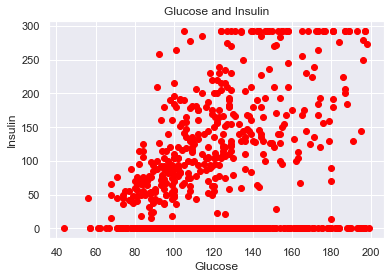

In [32]:
plt.scatter(diabetes_df['Glucose'], diabetes_df['Insulin'], color='red')

plt.title('Glucose and Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

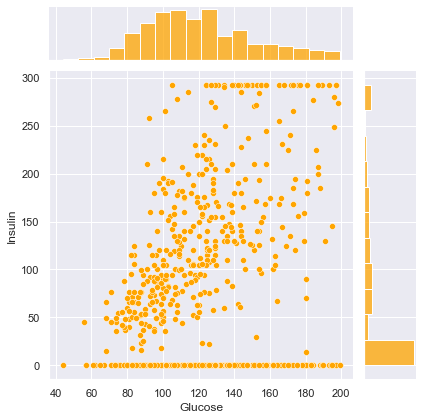

In [31]:
sns.jointplot(x='Glucose', y='Insulin', data=diabetes_df, kind='scatter', color='orange')


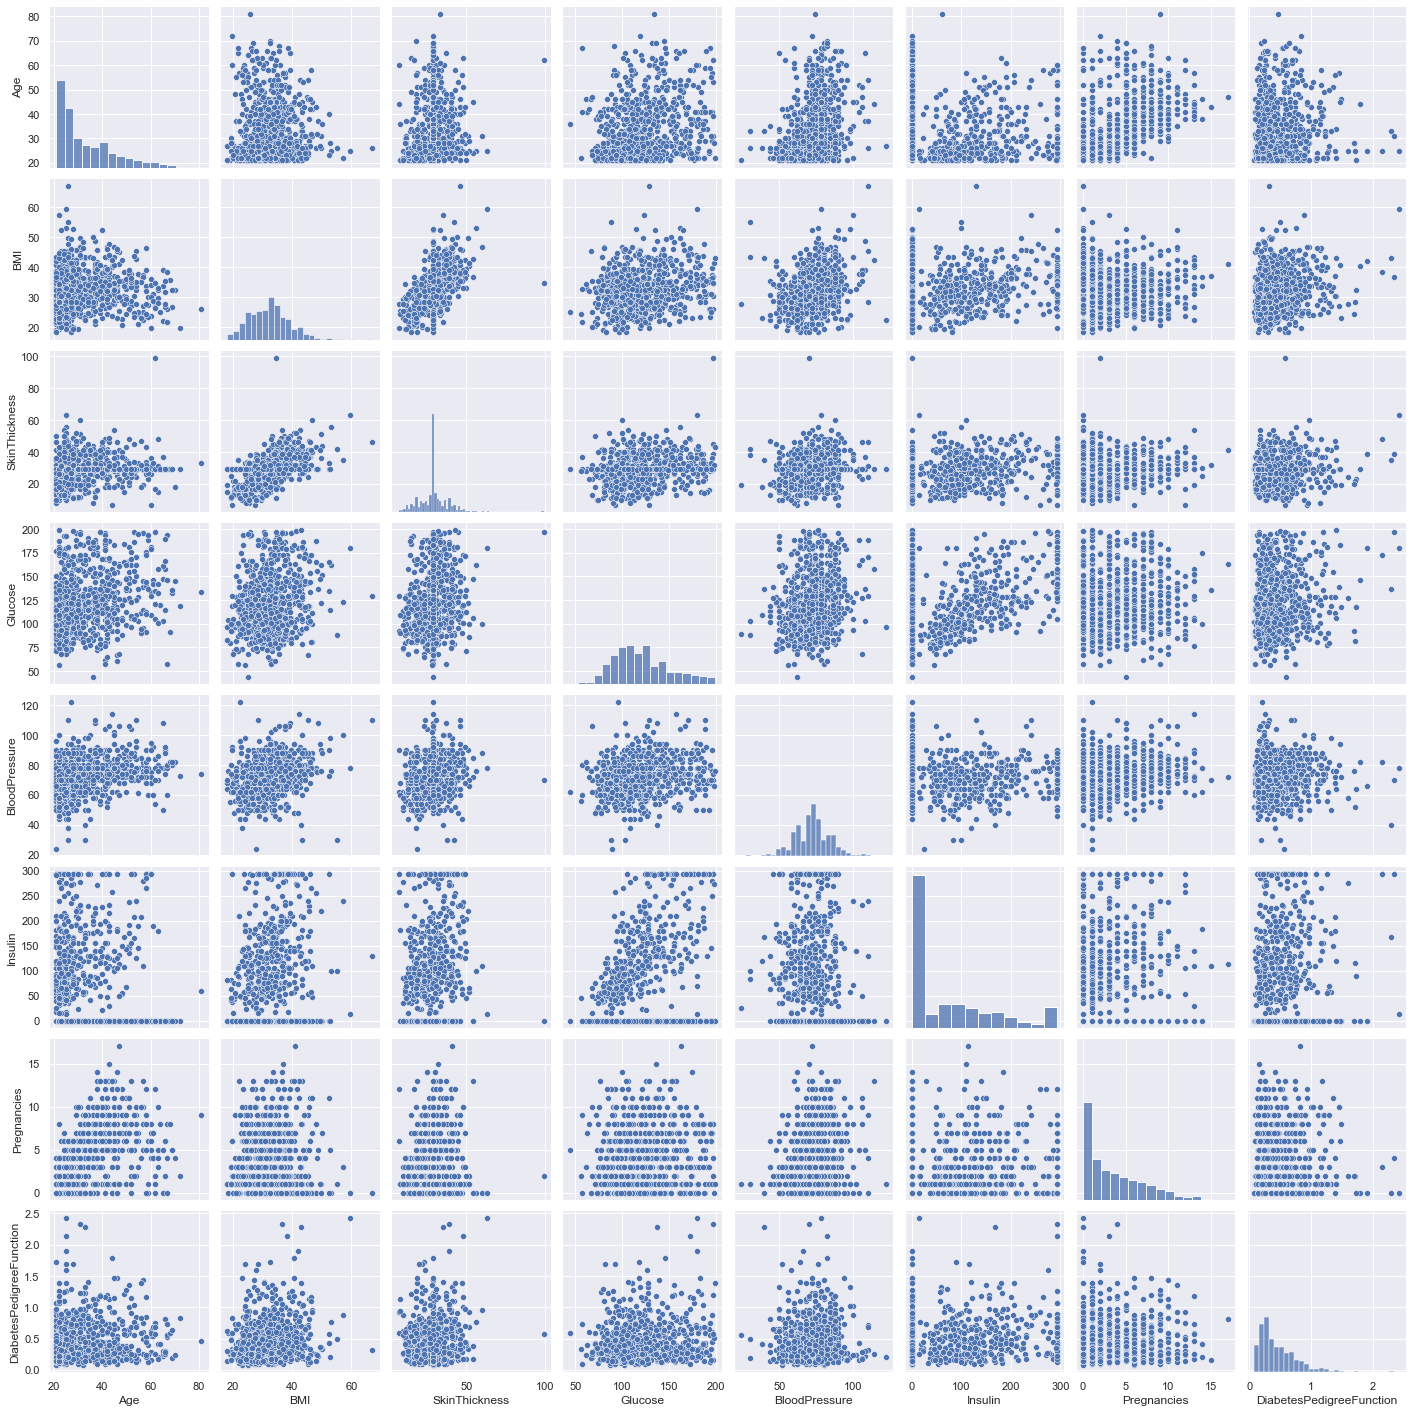

In [30]:
num_columns = list(set(diabetes_df.columns) -  set(['Outcome','Age_expert','Age_equal']))
sns.pairplot(diabetes_df[num_columns])

In [33]:
corr_matrix = diabetes_df[num_columns].corr() #По умолчанию - корреляция Пирса, но можно задать параметрами другие типы
#К примеру method='spearman'
#Считается, что то что больше 0.5 - сильная корреляция, то что 0.3-0.5 - средняя, меньше 0.3 - слабые
corr_matrix

,Age,BMI,SkinThickness,Glucose,BloodPressure,Insulin,Pregnancies,DiabetesPedigreeFunction
Age,1.000,0.026,0.128,0.267,0.325,-0.070,0.544,0.034
BMI,0.026,1.000,0.542,0.231,0.281,0.192,0.022,0.153
SkinThickness,0.128,0.542,1.000,0.193,0.193,0.104,0.083,0.101
Glucose,0.267,0.231,0.193,1.000,0.218,0.305,0.128,0.137
BloodPressure,0.325,0.281,0.193,0.218,1.000,-0.054,0.209,-0.003
Insulin,-0.070,0.192,0.104,0.305,-0.054,1.000,-0.079,0.188
Pregnancies,0.544,0.022,0.083,0.128,0.209,-0.079,1.000,-0.034
DiabetesPedigreeFunction,0.034,0.153,0.101,0.137,-0.003,0.188,-0.034,1.000


<AxesSubplot:>

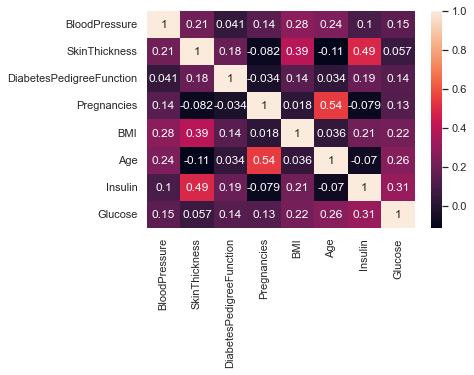

In [42]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

#### Количественные и качественные признаки

In [34]:
diabetes_df.pivot_table(['Glucose', 'Insulin'],['Outcome'], aggfunc='mean')

,Glucose,Insulin
Outcome,,
0,110.710,64.326
1,142.166,87.642


<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

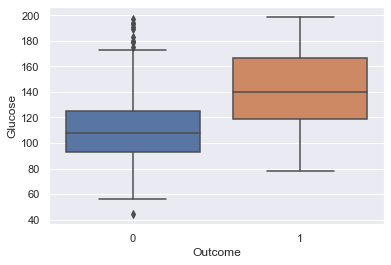

In [35]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)

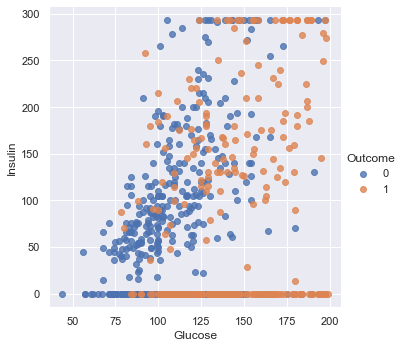

In [36]:
sns.lmplot('Glucose', 'Insulin', data=diabetes_df, hue='Outcome', fit_reg=False)

#### Только качественные признаки

In [37]:
pd.crosstab(diabetes_df['Age_equal'], diabetes_df['Outcome'], margins=True)

Outcome,0,1,All
Age_equal,,,
"(20.94, 33.0]",352,122,474
"(33.0, 45.0]",88,88,176
"(45.0, 57.0]",32,44,76
"(57.0, 69.0]",26,13,39
"(69.0, 81.0]",2,1,3
All,500,268,768


<AxesSubplot:xlabel='Age_equal', ylabel='count'>

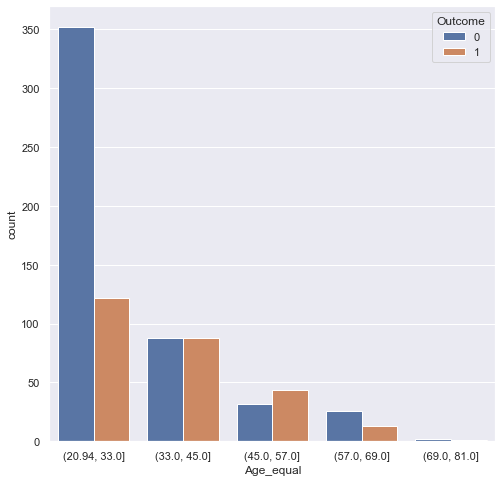

In [39]:
sns.set(rc = {'figure.figsize':(8, 8)})

sns.countplot(x='Age_equal', hue='Outcome', data=diabetes_df)

### Нормализация данных

<AxesSubplot:ylabel='Density'>

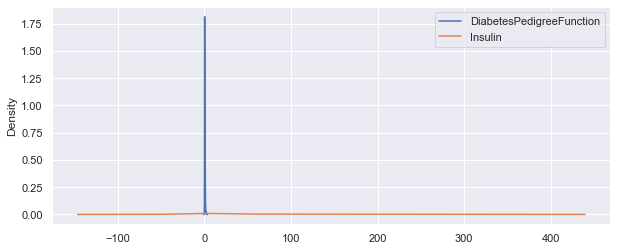

In [40]:
diabetes_df[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

<AxesSubplot:>

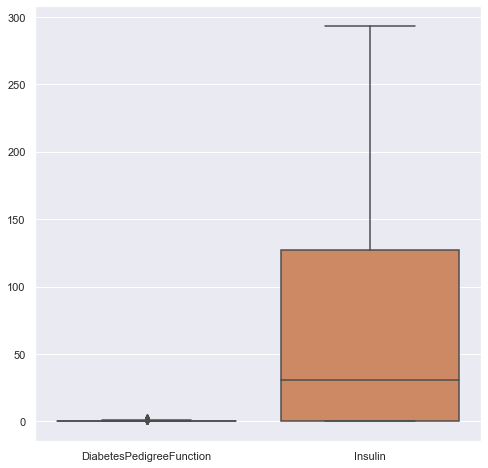

In [49]:
sns.boxplot(data=diabetes_df[['DiabetesPedigreeFunction', 'Insulin']])

In [50]:
std_scaler = StandardScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_std_scaled = std_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

minmax_scaler = MinMaxScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_minmax_scaled = minmax_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

type(cols_std_scaled)

numpy.ndarray

In [51]:
print('Mean after standardization:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_std_scaled[:,0].mean(), cols_std_scaled[:,1].mean()))
print('\nStandard deviation after standardization:\nGlucose={:.2f}, Insulin={:.2f}\n'
      .format(cols_std_scaled[:,0].std(), cols_std_scaled[:,1].std()))

print('Mean after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].mean(), cols_minmax_scaled[:,1].mean()))
print('\nStandard deviation after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].std(), cols_minmax_scaled[:,1].std()))

Mean after standardization:
DiabetesPedigreeFunction=0.00, Insulin=0.00

Standard deviation after standardization:
Glucose=1.00, Insulin=1.00

Mean after min-max scaling:
DiabetesPedigreeFunction=0.17, Insulin=0.25

Standard deviation after min-max scaling:
DiabetesPedigreeFunction=0.14, Insulin=0.31


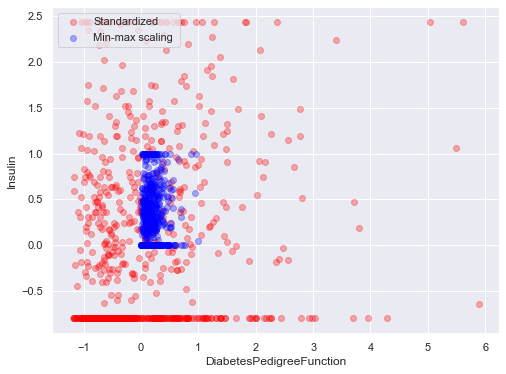

In [52]:
plt.figure(figsize=(8,6))
#plt.scatter(diabetes_df['DiabetesPedigreeFunction'], diabetes_df['Insulin'], color='orange', label='input scale', alpha=0.5)  
plt.scatter(cols_std_scaled[:,0], cols_std_scaled[:,1], color='red', label='Standardized', alpha=0.3)
plt.scatter(cols_minmax_scaled[:,0], cols_minmax_scaled[:,1], color='blue', 
            label='Min-max scaling ', alpha=0.3)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Insulin')
plt.legend(loc='upper left')


<AxesSubplot:ylabel='Density'>

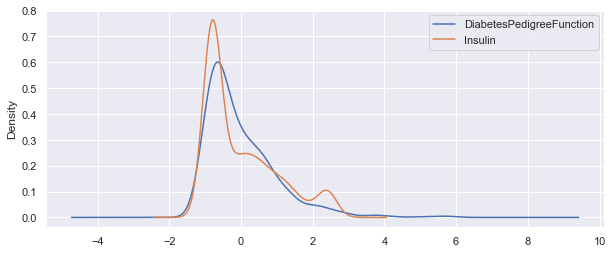

In [53]:
diabetes_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['DiabetesPedigreeFunction', 'Insulin'])

diabetes_df_scaled[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), 
                                                                sharex=False, figsize=(10, 4))

<AxesSubplot:>

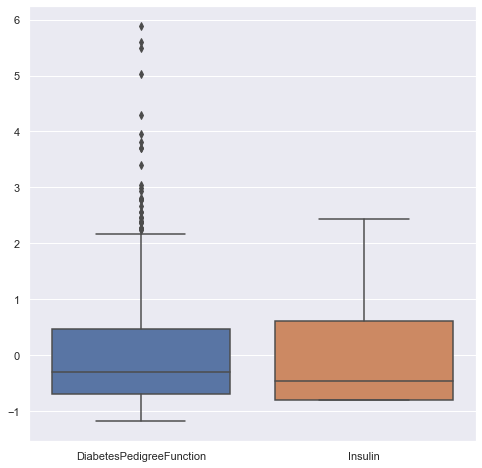

In [54]:
sns.boxplot(data=diabetes_df_scaled[['DiabetesPedigreeFunction', 'Insulin']])

<AxesSubplot:>

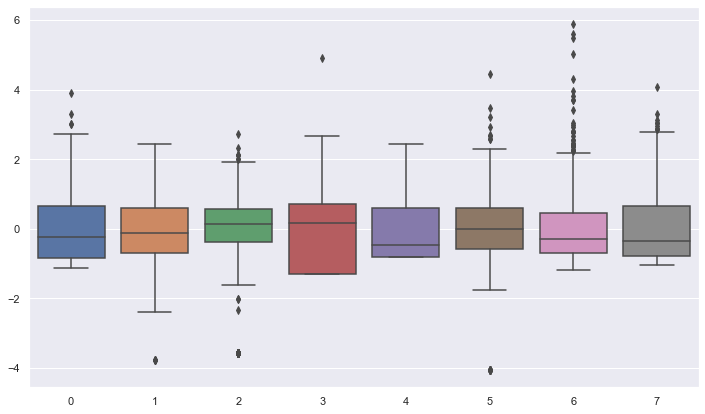

In [55]:

scaler = StandardScaler()
tr_diabetes_df = scaler.fit_transform(diabetes_df[['Pregnancies','Glucose', 'BloodPressure','SkinThickness',
                                                   'Insulin','BMI', 'DiabetesPedigreeFunction','Age']])

plt.subplots(figsize=(12,7))
sns.boxplot(data=tr_diabetes_df)